### 摘要
---
- 本文承接前一篇资产配置文章，介绍了风险平价组合的理论与实践
- 将风险平价组合在大类资产上进行了实证研究，发现综合风险收益各方面的表现来看，risk parity都有着不俗的表现
- 此外，文中还将常见几种资产配置方法进行了实证比较，包括`最小方差组合、风险平价组合、最大多元化组合以及等权组合`，研究发现从收益风险角度来看最大多元化组合表现较优
- 最后，限于篇幅，本文后续将对风险平价组合进行的更深入探究（加入其他资产、测试其他回测区间等）以及研究加入预期收益之后的资产配置实战策略（希望做出小白都能直接跟投的长期理财策略）

### 1、简介
---
-  资产配置在投资中是非常重要的过程，经典的资产配置方式就是马格维茨的均值-方差模型。目标是在给定预期收益率下最小化方差(风险)，或给定风险水平下最大化收益，通过拉格朗日乘子法，可以计算出一个有效前沿，我们可以根据有效前沿来配置资产。但在实践过程中，我们常常发现计算的结果是某几个资产的权重特别大，收益和风险都集中在了这些资产上

- 也有许多对均值方差进行优化的方法，比如加入风险厌恶系数考虑效用函数的最大化，或者加入个性化条件，要求每一大类的配置比例都不得超过35%等，还有从统计的角度出发，找一些更好的估计协方差阵的方法

- 基于均值方差模型的不足，PanAgora基金的首席投资官Edward Qian博士提出了著名的风险平价(Risk Parity)策略，这一思想被Bridgewater基金运用于实际投资中，本贴将详细介绍风险平价配置方法的理论与实践

### 基本理念
---

- 传统的大类资产配置方法更多关注的是投资组合的总体风险，比如在本文前一篇介绍[`最小方差组合的理论与实践`](https://uqer.io/community/share/57e0e21f228e5b049cfb93f0?source=community)中，优化的目标是组合整体的风险最小，而不关心各个标的对整体风险的贡献

- 这样有可能会导致组合整体风险对某个资产暴露极高的风险敞口，从而使得组合的业绩与该资产表现极其相关，并没有起到很好的分散效果

- 风险平价策略通过平衡分配不同资产类别在组合风险中的贡献度，实现了投资组合的风险结构优化；通过风险平价配置，投资组合不会暴露在单一资产类别的风险敞口中，因而可以在风险平衡的基础上实现理想的投资收益

### 2、理论介绍
---
- 假设投资组合共有$n$个资产，第$i$个资产对整个投资组合的风险贡献值为$RC_{i}$，则可以得到：
$$RC_i=\frac{w_i}{\sigma}\frac{\partial \sigma}{\partial w_i}= w_i \frac{(\boldsymbol \Omega \boldsymbol w)_i}{\boldsymbol w' \boldsymbol \Omega \boldsymbol w}$$

- 其中，$\sigma$为投资组合的波动率，$w_i$为某个资产的权重，$\boldsymbol \Omega$为投资组合收益率的协方差矩阵，$(\boldsymbol \Omega \boldsymbol w)_i$为向量$\boldsymbol \Omega \boldsymbol w$的第$i$行元素

- 如上，可以很明显看出，资产$i$对组合的风险贡献可以用$w_i(\boldsymbol \Omega \boldsymbol w)_i$来表示，那么保证每个资产对组合的风险贡献一致则可以转化为如下优化问题：
$$min \quad f(\omega) = \sum_{i=1}^{N} \sum_{j=1}^{N}[\omega_i(\boldsymbol \Omega \boldsymbol w)_i-\omega_j(\boldsymbol \Omega \boldsymbol    w)_j]^2$$
$$s.t.\quad \boldsymbol  \omega' \boldsymbol 1=1$$
$$\quad \quad \quad w_i \geq 0$$

### 3、实证介绍
---

- 首先以一个例子来介绍风险平价配置的流程，例子同前文，以上证50成分股为例

- 然后，利用优矿回测框架实证风险平价配置方法的历史表现，优缺点等

- 最后，在上述过程中，`笔者用到了自己平时研究中的常用工具库，详尽的代码注释，分享私有干货（有条件的）`


In [ ]:
import lib.Uqer as uqer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
from datetime import datetime as dt
from CAL.PyCAL import font

/home/ipython/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


##### 如下例子介绍，从协方差估计到配置完成的的全过程，具体细节参见私有库Uqer

In [ ]:
date = '20161011'
tickers = uqer.get_idx_cons('000016', date) # 动态获取上证50成分股
cov_mat = uqer.get_covmat(tickers, date)  # 估计协方差矩阵，默认用过去三年数据
wts = uqer.get_smart_weight(cov_mat, method='risk parity')  # 得到risk parity最优权重配置
wts.head()

ticker
600000    0.025034
600010    0.017646
600016    0.025765
600028    0.022689
600029    0.016389
dtype: float64

##### 接下来，和前一篇类似，在优矿中进行risk parity的实证研究

 - 相比最小方差组合而言，风险平价配置方法在收益风险比上确实显得更优秀一些
 - 从2007年至今，风险平价组合夏普值0.26，而基准（市值加权）的只有0.22
 - 尽管两者的夏普值相差并不是特别明显（`主要是上证50各成分股之间的相关性特别高，导致配置效果不尽理想`），但差异足以说明问题，后续将继续探究这个问题

### 其他常见配置方法在上证50中的实证结果
---
- 除了前面介绍的最小方差组合、风险评价组合外，常见的配置方法还有等权组合、最大多元化组合
- 对于上述配置方法的理论部分这里不再详细介绍了，各种配置方法都有不同的立足点
- 在优矿**【Smart Beta投资白皮书】**中，我们展现了这些方法在上证50中的实证结果，这里就简单列示报告中的结果，如下图所示（对smart beta感兴趣的小伙伴可以详细参见我们的投资白皮书）

![图片注释](http://storage.uqer.io/548e9868f9f06c45e7073e66/08e2f960-90f1-11e6-9b7a-f8bc124ed898)

### 4、重新思考：风险平价与资产配置
---

- 前文内容一方面是与前一篇最小方差组合在布局上保持一致，另一方面也作为简单例子，讲清楚risk parity的理论与简单应用

- risk parity作为资产配置的经典方法，将risk parity应用在相关性非常强的资产上可谓大材小用，从如上的例子回测结果我们也可以看出些端倪
 
- 正如马科维茨所讲，不要把鸡蛋放在同一个篮子里，分散化投资可以帮我规避没必要的非系统性风险

- 这里，作为大类资产配置的例子，我们的可选投资标的并不局限于股票，下面**以实例来实证risk parity在大类资产配置上的效果**

	- 说明1：选取的大类标的包括，`沪深300、中小板指、恒生指数、标普500、黄金`
	- 说明2：选取这几个标的的一个原因是各自都具有非常好的代表性，另一方面是各标的的波动水平都处在同一水平、能够比较好的体现risk parity的优势（**加入债券的话，会出现配置的结果基本都是债券的情形，当然若追求固定收益类的低风险建议加入债券**）
	- 说明3：其实还可以加入`大宗商品、石油`作为标的资产以更显分散化，但一方面是这两者在过去几年都处于熊市、另外限于可获取的历史数据时间长度问题，在下面的例子中没有加入，但在后续的文章中将会更深入去探讨这个问题

##### 第一步要先计算各标的的日度收益率，详细如下

In [ ]:
start_date = '20060201'
end_date = '20161012'
idx = ['000300', '399005', 'HSI', 'SPX', '000012']  # 沪深300、中小板指、恒生指数、标普500、国债
data1 = DataAPI.MktIdxdGet(ticker=idx, beginDate=start_date, endDate=end_date, field=u"secShortName,tradeDate,CHGPct", pandas="1")
data2 = DataAPI.ChinaDataGoldClosePriceGet(indicID=u"M140000090", beginDate=start_date, endDate=end_date, field='periodDate,dataValue')
data2 = data2.set_index('periodDate').pct_change().dropna().rename(columns={'dataValue':'CHGPct'}).reset_index().rename(columns={'periodDate':'tradeDate'})
data2['secShortName'] = '上海黄金现货' 
total_daily_return = pd.concat([data1, data2]).pivot(index='tradeDate', columns='secShortName', values='CHGPct').dropna(how='all').fillna(0.0)
total_daily_return.index = map(lambda x: x.replace('-',''), daily_return.index)
total_daily_return.tail()

secShortName,上海黄金现货,上证国债,中小板指,恒生指数,标普500,沪深300
20161006,0.000000,0.00000,0.00000,0.00690,-0.00181,0.00000
20161007,0.000000,0.00000,0.00000,-0.00420,-0.00325,0.00000
20161010,-0.000586,0.00126,0.01867,0.00000,0.00461,0.01247
20161011,0.001798,0.00023,0.00529,-0.01267,-0.01245,0.00385
20161012,0.000000,0.00003,0.00012,-0.00605,0.00115,-0.00198


##### 准备好各资产的收益率数据，下面就开始进行回测，做几点说明：
---
- 策略每季度末进行换仓
- 用过去3年的历史数据估算协方差矩阵
- 下面的结果计算了常见的资产配置的实证结果，包括：`最小方差组合、风险平价组合、最大多元化组合、等权组合`

In [ ]:
# backtest
selected_daily_return = total_daily_return[['沪深300', '中小板指', '恒生指数', '标普500', '上海黄金现货']]
Ndays = 750   # 用多少天估算协方差矩阵
starts = uqer.shift_date(selected_daily_return.index[0], Ndays, 'forward')
ends = selected_daily_return.index[-1]
portfolio_cum_value = pd.DataFrame(index=selected_daily_return.loc[starts:ends].index, columns=['min variance', 'risk parity', 'max diversification','equal weight'], data=0.0)  # 记录组合累计净值
portfolio_positions = {}  # 记录组合各资产持仓 
allocation_methods = {'min variance', 'risk parity', 'max diversification','equal weight'}
for k in allocation_methods:
    portfolio_positions[k] = pd.DataFrame(index=portfolio_cum_value.index, columns=selected_daily_return.columns, data=0.0)
date_list = sorted(uqer.get_dates(starts, ends, 'quarterly')+[starts, ends])
for i in range(len(date_list)-1):
    # print i
    current_period = date_list[i]
    next_period = date_list[i+1]
    tmp_date = uqer.shift_date(current_period, Ndays)
    cov_mat = selected_daily_return.loc[tmp_date:current_period].cov()*250
    # 权重优化
    for j in allocation_methods:
        wts = uqer.get_smart_weight(cov_mat, method=j, wts_adjusted=False)
        daily_rtn = selected_daily_return.loc[current_period:next_period]
        daily_rtn.ix[0] = 0.0
        assets_positions = (daily_rtn + 1).cumprod() * wts
        portfolio_positions[j].loc[assets_positions.index,:] = (assets_positions.T / assets_positions.sum(axis=1)).T
        cum_value = assets_positions.sum(axis=1)
        if i == 0:
            portfolio_cum_value.loc[cum_value.index, j] = cum_value * 1.0
        else:
            portfolio_cum_value.loc[cum_value.index, j] = cum_value * portfolio_cum_value.loc[cum_value.index[0],j]

### 如上，回测好不同配置方法的历史表现后，我们从两个角度来分析
---
- A、紧贴本文题目，看risk parity配置方法相对于各标的资产是否具有配置价值
- B、不同资产配置方法的相互比较

##### A、如下，我们展示了自20090101至20161012的各资产和risk parity组合的累计净值，以及各自的主要风险收益指标

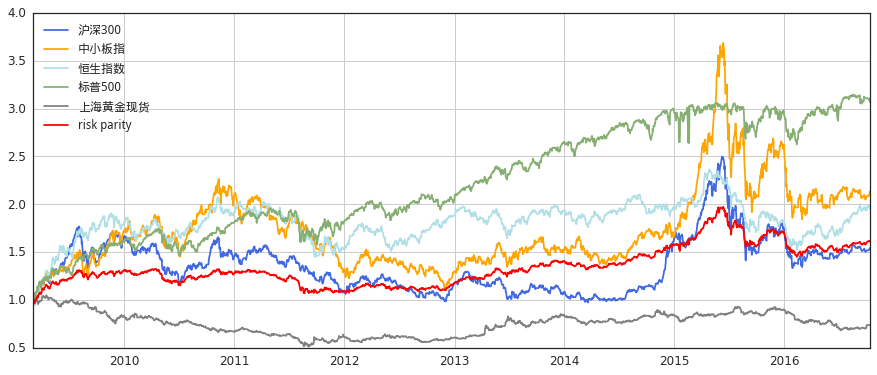

In [ ]:
assets_cum_value = (total_daily_return.loc[starts:ends] + 1).cumprod()
assets_cum_value['date'] = map(lambda x: dt.strptime(x, '%Y%m%d'), assets_cum_value.index)

fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(111)
font.set_size(12)
colors = ['royalblue','orange','powderblue','sage','gray']
columns = ['沪深300', '中小板指', '恒生指数', '标普500', '上海黄金现货']
for i in range(len(columns)):
    ax.plot(assets_cum_value['date'].values, assets_cum_value[columns[i]].values, color=colors[i])
ax.plot(assets_cum_value['date'].values, portfolio_cum_rtn['risk parity'].values, color='r')
ax.legend([i.decode('utf8') for i in columns] + ['risk parity'], prop=font, loc='best')
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
ax.grid()

In [ ]:
assets_indicators = uqer.cal_indicators(selected_daily_return.loc[starts:ends])
portfolio_indicators = uqer.cal_indicators(portfolio_cum_value.pct_change().dropna())
assets_indicators['risk parity'] = portfolio_indicators['risk parity']
assets_indicators

secShortName,沪深300,中小板指,恒生指数,标普500,上海黄金现货,risk parity
年化收益率,4.76%,9.66%,9.46%,15.82%,-1.28%,6.73%
年化标准差,24.90%,27.53%,19.79%,19.44%,15.52%,11.95%
夏普值,0.19,0.35,0.48,0.81,-0.08,0.56
最大回撤,52.41%,55.22%,37.26%,18.73%,48.96%,26.55%


### 总结几点：
---
- 综合风险收益的表现来看，risk parity确实表现较优，夏普值仅低于标普500，这一点也很好理解，毕竟在回测期间里，标普走出了一波大牛市，累计收益高达200%多
- 另外，经过risk parity风险控制，组合的年化波动率低于任何资产，体现了该方法在风险控制上的强大性
- 最后，risk parity最大回撤也仅大于标普500，很显著的低于其他资产，与此同时其收益表现也还不错

### B、不同资产配置方法的对比

In [ ]:
portfolio_indicators

,min variance,risk parity,max diversification,equal weight
年化收益率,5.12%,6.73%,7.69%,8.51%
年化标准差,11.55%,11.95%,12.31%,14.03%
夏普值,0.44,0.56,0.63,0.61
最大回撤,23.59%,26.55%,25.45%,30.57%


### 同样说明几点
---
- 各种配置方法都有各自的特点，所得到的结论和在学校时老师介绍的各种实证研究类似：等权永远都是表现的都还不错的组合
- 对于追求收益的投资者来说，max diversification是个不错的选择；从规避风险的角度来看，最小方差组合是首选
- 最后，给各路好奇的宝宝看看max diversification的历史持仓比例，基本上全程都高配标普500，但不幸的是也高配了黄金。。。

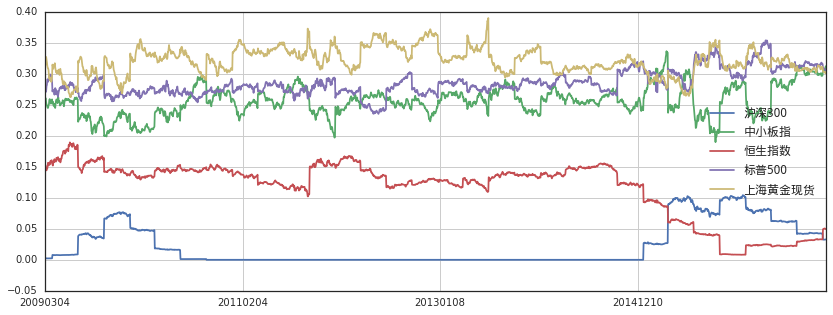

In [ ]:
ax = portfolio_positions['max diversification'].plot(figsize=(14,5))
ax.legend(prop=font, loc='best')
ax.grid()

### 5、总结与预告
---
- 本来后续还有两大块内容要写的，分别是`对上述风险平价组合的更深入探究`（加入其他资产、测试其他回测区间等）以及`加入预期收益之后的资产配置实战策略`（希望做出小白都能直接跟投的长期理财策略）；但发现本文篇幅已经够多了，就安排到下一篇来写啦
- 对于本中文的Uqer函数包，算是个人部分私藏品，当然不可能说直接无私分享啦，至于啥条件，暂时还没想好呀，待我和小秘书交流交流~~